<font color='yellow'>
<h1><b>FlyMe - Développez un chatbot pour réserver des vacances</b></h1>

<h2>Projet 10 - Parcours Ingénieur IA - Openclassrooms</h2>

</font>

[GITHUB](https://github.com/blanchonnicolas/IA_Project10_Openclassrooms_Chatbot)<br>
[DATASET](https://www.microsoft.com/en-us/research/project/frames-dataset/#!download)<br>

**FlyMe** est une agence qui propose des voyages clé en main pour les particuliers ou les professionnels.<br>
<img src="files/FlyMe_image.png">


Fly Me a lancé un projet ambitieux de développement d’un chatbot pour aider les utilisateurs à choisir une offre de voyage.<br>
Je suis l’un des ingénieurs IA au sein de l’équipe de cette entreprise, et je suis mobilisé pour le *projet chatbot - Construction d'un MVP pour les collaborateurs internes*.<br>
Ce premier MVP devra **pouvoir identifier dans la demande de l’utilisateur les cinq éléments suivants** :

- ✅ Ville de départ</br>
- ✅ Ville de destination
- ✅ Date aller souhaitée du vol
- ✅ Date retour souhaitée du vol
- ✅ Budget maximum pour le prix total des billets

> **Note:** Si un des éléments est manquant, le chatbot devra pouvoir poser les questions pertinentes (en anglais) à l’utilisateur pour comprendre complètement sa demande.

***

La solution de Chatbot, reposera sur la **stack téchnique suivante**:

1. Microsoft Bot [Microsoft Bot Framework SDK v4 for Python](https://github.com/microsoft/botbuilder-python)
2. [Service cognitif LUIS d’Azure](https://azure.microsoft.com/fr-fr/services/cognitive-services/language-understanding-intelligent-service)
3. Service Web App d’Azure
4. Bot Framework Emulator
5. [Azure application insight](https://docs.microsoft.com/fr-fr/azure/azure-monitor/app/app-insights-overview)


***
Au travers de ce notebook, nous réalisons l'étude préparatoir des données:<br>
- [Lecture des données](#Lecture-des-données)<br>
- [Analyse des données](#Analyse-des-données)<br>
- [Nettoyage des données](#Nettoyage-des-données)<br>
- [Sauvegarde des données](#Sauvegarde-des-données)<br>


## Lecture des données

In [1]:
#Import functions createdon my side
from Functions_custo_by_Nico import *
Test_Imported_Functions()


Functions have been properly imported !


In [2]:
src_path = os.path.abspath(os.path.join("../IA_Project10_Openclassrooms_Chatbot"))
if src_path not in sys.path:
    sys.path.append(src_path)

#Build Data path
data_path = os.path.join(src_path, "dataset")
print(data_path)
for f in os.listdir(src_path):
    print("|_",f)

c:\Users\blanc\OpenClassrooms\IA_Project10_Openclassrooms_Chatbot\dataset
|_ .git
|_ .github
|_ .pytest_cache
|_ .vscode
|_ botbuilder
|_ dataset
|_ EDA.ipynb
|_ files
|_ Fly-Me-BOT-Azure.bot
|_ FlyMe_BOT_MVP
|_ Functions_custo_by_Nico.py
|_ luis
|_ luis_util.py
|_ README.md
|_ requirements.txt
|_ Sources
|_ unit_test
|_ __pycache__


In [3]:
#Read data
data = pd.read_json(os.path.join(data_path, 'frames', 'frames.json'))
print("Dimensionnalité : ", data.shape)
data.head()

Dimensionnalité :  (1369, 5)


,user_id,turns,wizard_id,id,labels
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc..."
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'userSurveyRating': 2.0, 'wizardSurveyTaskSuc..."
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."


## Analyse des données

Comme nous avons pu le voir ci-dessous, les données Frames sont au format JSON [Plus dinfo ici](https://www.microsoft.com/en-us/research/project/frames-dataset/download/).
Chaque dialogue BOT/User est constitué de **5 champs principaux**: 
- user_id
- wizard_id
- id
- labels
- turns

Nous allons ci-dessous **explorer les champs labels et turns**, afin de comprendre leur structure respective.
> Note: Les champs labels et turns affichent l'imbrication de dict


In [13]:
data.describe(include='all')


,user_id,turns,wizard_id,id,labels
count,1369,1369,1369,1369,1369
unique,11,1369,12,1369,16
top,U22K1SX9N,[{'text': 'I'd like to book a trip to Atlantis...,U21T9NMKM,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
freq,345,1,301,1,929


In [14]:
#Column Label : Segregate Json format and spread info in new dataframe columns
satisfaction_data = pd.json_normalize(data["labels"])
data["userSurveyRating"] = satisfaction_data["userSurveyRating"]
data["wizardSurveyTaskSuccessful"] = satisfaction_data["wizardSurveyTaskSuccessful"]
print("Il y a ", data[data["wizardSurveyTaskSuccessful"] == False].shape[0],
      "dialogues qui ont rendu un effet négatif.")
#data.describe(include='all')


Il y a  82 dialogues qui ont rendu un effet négatif.


In [6]:
# Cautious!!! Some values are not integer !!!
data["userSurveyRating"].unique()


array([4.  , 3.  , 2.  , 5.  , 1.  ,  nan, 4.8 , 4.5 , 4.99, 3.5 ])

In [7]:
#Column turns : Segregate Json format and spread info in new dataframe columns
entry_id = 0
data_turns = pd.DataFrame(data['turns'][entry_id])
data_turns

,text,labels,author,timestamp,db
0,I'd like to book a trip to Atlantis from Capri...,"{'acts': [{'args': [{'val': 'book', 'key': 'in...",user,1.471272e+12,NaN
1,"Hi...I checked a few options for you, and unfo...",{'acts': [{'args': [{'val': [{'annotations': [...,wizard,1.471272e+12,{'result': [[{'trip': {'returning': {'duration...
2,"Yes, how about going to Neverland from Caprica...","{'acts': [{'args': [{'val': 'Neverland', 'key'...",user,1.471273e+12,NaN
3,I checked the availability for this date and t...,{'acts': [{'args': [{'val': [{'annotations': [...,wizard,1.471273e+12,"{'result': [[], [], [], [], [], []], 'search':..."
4,I have no flexibility for dates... but I can l...,"{'acts': [{'args': [{'val': False, 'key': 'fle...",user,1.471273e+12,NaN
5,I checked the availability for that date and t...,{'acts': [{'args': [{'val': [{'annotations': [...,wizard,1.471273e+12,"{'result': [[]], 'search': [{'ORIGIN_CITY': 'A..."
6,I suppose I'll speak with my husband to see if...,"{'acts': [{'args': [], 'name': 'thankyou'}], '...",user,1.471273e+12,NaN


In [8]:
# Display turns values for a chosen entry_id (= raw of Frames dataset), and looking more specifically to first discussion exchange  [0]
data['turns'][entry_id][0]

{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
 'labels': {'acts': [{'args': [{'val': 'book', 'key': 'intent'}],
    'name': 'inform'},
   {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
     {'val': 'Caprica', 'key': 'or_city'},
     {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
     {'val': '8', 'key': 'n_adults'},
     {'val': '1700', 'key': 'budget'}],
    'name': 'inform'}],
  'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
    'name': 'inform'},
   {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
     {'val': 'Caprica', 'key': 'or_city'},
     {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
     {'val': '8', 'key': 'n_adults'},
     {'val': '1700', 'key': 'budget'}],
    'name': 'inform'}],
  'active_frame': 1,
  'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
     'budget': [{'val': '1700.0', 'negated': False}],
     'dst_city': [{

> Note: Les champs turns affichent l'imbrication de dict. Nous developperons une fonction ci-dessous afin de comprendre sa structure

Dans un premiers temps, nous analysons le nombre d'échanges User / BOT comptabilisé dans notre jeu de données.

Ensuite, nous chercherons à **extraire les données qui nous intérresse**, afin de les réutiliser lors de l'entrainement de notre BOT (Utilisation de LUIS)

In [8]:
#Study number of User/Wizard authoring text from dialogue
dic_author = {}
for turns in data['turns']:
    for message in turns:
        author = message["author"]
        if not author in dic_author.keys():
            dic_author[author] = 1
        else:
            dic_author[author] += 1
pd.json_normalize(dic_author)


,user,wizard
0,10407,9579


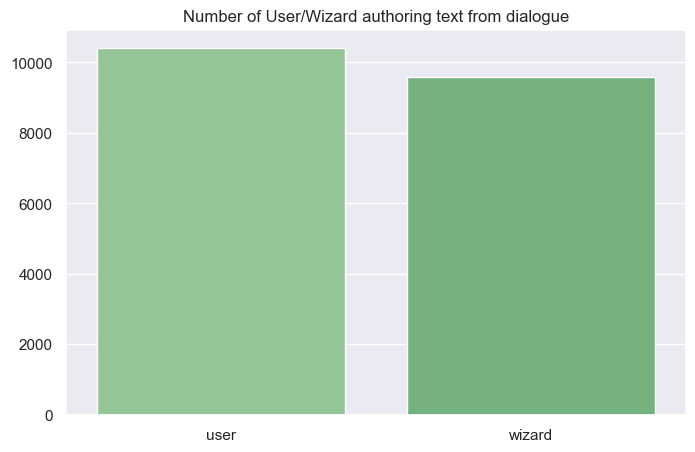

In [13]:
#Définir la taille du graphique
fig, ax = plt.subplots(figsize=(8,5))
#Définir lae type du graphique, ici BARPLOT avec en Labels l'index du nom des libelle
ax = sns.barplot(data=pd.json_normalize(dic_author))
plt.title(f"Number of User/Wizard authoring text from dialogue")
#Afficher le graphique
plt.show()

In [37]:
# Etract values recognized by BOT and usefull for our application # In labels column: 'acts': [{'name':
interesting_name = []
for entry_id in range(0,1369):
    for dialog_step in [data['turns'][entry_id][:1]]: # We look into 2 first dialogs only
        for dialog in dialog_step:    
            if dialog["author"] == "user": # We catch only user dialog
                acts = dialog["labels"]["acts"] # We look into labels info from turns, and more precisely under "act" column (Exclusion of 'acts_without_refs')
                for act in acts:
                    name = act["name"]
                    interesting_name.append(name)

interesting_name_unique, interesting_name_count = np.unique(interesting_name, return_counts=True)
# for i in range(len(interesting_name_unique)):
#     print(f"Name : {interesting_name_unique[i]} occurence = {interesting_name_count[i]}")
name_analysis = pd.DataFrame(columns=['Name under acts', 'Occurence'])
name_analysis['Name under acts'] = interesting_name_unique
name_analysis['Occurence'] = interesting_name_count
name_analysis.sort_values(by=['Occurence'], ascending=False)

,Name under acts,Occurence
1,inform,2252
0,greeting,405
2,request,15
3,thankyou,1


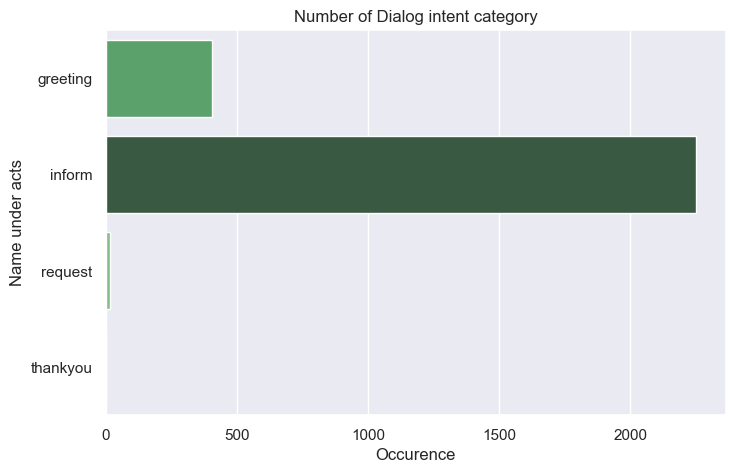

In [19]:
#Définir la taille du graphique
fig, ax = plt.subplots(figsize=(8,5))
#Définir lae type du graphique, ici BARPLOT avec en Labels l'index du nom des libelle
ax = sns.barplot(data=name_analysis, x=name_analysis["Occurence"], y=name_analysis["Name under acts"], palette=colors_from_values_integer(name_analysis["Occurence"], "Greens_d"))
plt.title(f"Number of Dialog intent category")
#Afficher le graphique
plt.show()

In [16]:
# Etract values recognized by BOT and usefull for our application # In labels column: 'acts': [{'name':
interesting_entities = []
for entry_id in range(0,1369):
    for dialog_step in [data['turns'][entry_id][:1]]: # We look into 2 first dialogs only
        for dialog in dialog_step:    
            if dialog["author"] == "user": # We catch only user dialog
                acts = dialog["labels"]["acts"] # We look into labels info from turns, and more precisely under "act" column (Exclusion of 'acts_without_refs')
                for act in acts:
                    if act["args"]:
                        for arg in act["args"]:
                            if "key" in arg: #info structure like: {'val': 'Atlantis', 'key': 'dst_city'},{'val': 'Caprica', 'key': 'or_city'}
                                key = arg["key"]
                                interesting_entities.append(key)

interesting_entities_unique, interesting_entities_count = np.unique(interesting_entities, return_counts=True)
# for i in range(len(interesting_entities_unique)):
#     print(f"Entity : {interesting_entities_unique[i]} occurence = {interesting_entities_count[i]}")
entity_analysis = pd.DataFrame(columns=['Entity under acts[args]', 'Occurence'])
entity_analysis['Entity under acts[args]'] = interesting_entities_unique
entity_analysis['Occurence'] = interesting_entities_count
entity_analysis.sort_values(by=['Occurence'], ascending=False)

,Entity under acts[args],Occurence
8,intent,1136
5,dst_city,897
14,or_city,811
19,str_date,381
11,n_adults,282
2,budget,238
6,end_date,215
12,n_children,114
9,max_duration,91
3,category,31


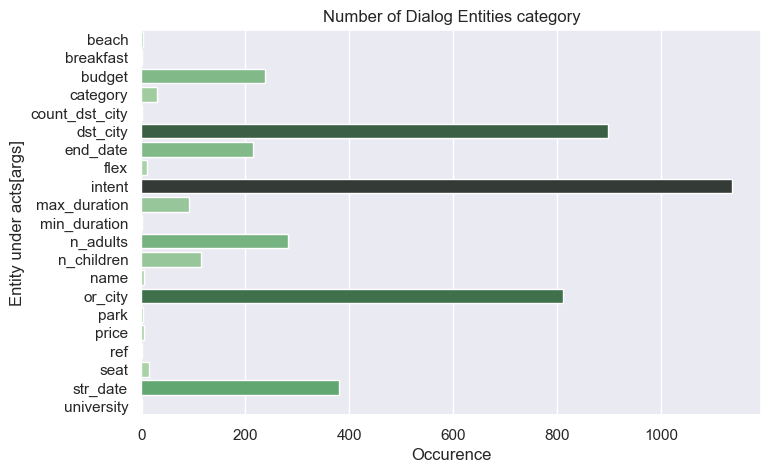

In [32]:
#Définir la taille du graphique
fig, ax = plt.subplots(figsize=(8,5))
#Définir lae type du graphique, ici BARPLOT avec en Labels l'index du nom des libelle
#
ax = sns.barplot(data=entity_analysis, x=entity_analysis["Occurence"], y=entity_analysis['Entity under acts[args]'], palette=colors_from_values_integer(entity_analysis["Occurence"], "Greens_d"))
plt.title(f"Number of Dialog Entities category")
#Afficher le graphique
plt.show()

In [12]:
# Extract values recognized by BOT and usefull for our application # In labels column: 'acts': [{'args': [{'val': 'book'
entry_id = 0 #Select data Frames raw by choosing entry_id

interesting_entities_value = {} # We want to consolidate intersting variables for our BOT
for dialog_step in [data['turns'][entry_id][:1]]: # We look into 2 first dialogs only
    for dialog in dialog_step:
        if dialog["author"] == "user": # We catch only user dialog
            acts = dialog["labels"]["acts"] # We look into labels info from turns, and more precisely under "act" column (Exclusion of 'acts_without_refs')
            for act in acts:
                #name = act["name"]
                if act["args"]:
                    for arg in act["args"]:
                        if "key" in arg and "val" in arg: #info structure like: {'val': 'Atlantis', 'key': 'dst_city'},{'val': 'Caprica', 'key': 'or_city'}
                            key = arg["key"]
                            val = arg["val"]                                                  
                        else:
                            continue
                        if key not in interesting_entities_value:
                            interesting_entities_value[key] = [key]
                        else:
                            continue
                        interesting_entities_value[key].append(val)
                #interesting_entities[key].append(name)
interesting_entities_value


{'intent': ['intent', 'book'],
 'dst_city': ['dst_city', 'Atlantis'],
 'or_city': ['or_city', 'Caprica'],
 'str_date': ['str_date', 'Saturday, August 13, 2016'],
 'n_adults': ['n_adults', '8'],
 'budget': ['budget', '1700']}

Comme expliqué [ici](https://learn.microsoft.com/fr-fr/azure/cognitive-services/luis/concepts/application-design), notre schéma d'application (LUIS) devra contenir les intentions et les entités pertinentes pour la réservation de voyage.
***

> Note: Nous conservons uniquement les premiers echanges "turns" pour chaque ligne du jeu de données Frames.json

On remarque que notre jeu de données Frames.json les informations suivantes :
 - Intention: Reservation (**Book : spécifié dès le premier échange : *labels column: 'acts': [{'args': [{'val': 'book'***)
 - Destination: Atlantis
 - Origine: Caprica
 - Date: 13 Aout 2016
 - nombre d'adultes: 8
 - Budget: 1700
 - Ref: Nous avons exclus les arguments retrouvons ici les Tuples imbriqués, qui font références au message antérieurs de l'utilisateur (Nous n'utiliserons pas cette information dans le cadre de notre projet V1)

***

Voici les informations clés suivantes à déterminer par notre BOT : 
- 'dst_city'    (Occurence: 897)
- 'or_city'     (Occurence: 811)
- 'str_date'    (Occurence: 381)
- 'end_date'    (Occurence: 215)
- 'budget'      (Budget: 238)

>Nous notons ainsi que d'autres entités pourrait être pertinement ajoutées (nombre d'adultes, nombre d'enfants, durée maximum de voyage)

## Nettoyage des données

### Convertir les informations de notre dataset pour le rendre compatible avec le format JSON attendu par LUIS

Nous devons concevoir le schéma d’application LUIS. notamment :
- Intentions avec des exemples d’énoncés (Book_flight)
- [Entités](https://learn.microsoft.com/fr-fr/azure/cognitive-services/luis/luis-concept-entity-types) (éléments de données extraits de l’énoncé, ex: destination, la date, la catégorie de ticket et la classe de voyage, le nombre de voyageurs)
- Fonctionnalités

Les entités LUIS permettent au BOT de comprendre les événements / intentions. Cela permet de collecter des informations supplémentaires, afin que le BOT puisse poser des questions et répondre plus intelligemment. 
le fichier FlightBooking.json d'origine contient les intentions : « Book Flight », « Cancel » et « None », avec un ensemble d’entités telles que « From.Airport » et « To.Airport ».

Nous chercherons ci-dessous à :
1. Extraire les informations demandées pour notre MVP.
2. Formatter ces informations comme attendu par LUIS
> Note: Une attention particulière a été portée afin de nettoyer certains caractères préjudiciable à l'entrainement, tels que certaines monnaies (budget: $, £, €)

In [13]:
#Here an example of Utterance content
# "utterances": [
#     {
#       "text": "book flight from london to paris on feb 14th",
#       "intent": "Book flight",
#       "entities": [
#         {
#           "entity": "To",
#           "startPos": 27,
#           "endPos": 31
#         },

In [14]:
# Extract values recognized by BOT and usefull for our application # In labels column: 'acts': [{'args': [{'val': 'book'
entry_id = 0 #Select data Frames raw by choosing entry_id

interesting_entities_value = {} # We want to consolidate intersting variables for our BOT
for dialog_step in [data['turns'][entry_id][:1]]: # We look into 2 first dialogs only
    for dialog in dialog_step:
        if dialog["author"] == "user": # We catch only user dialog
            acts = dialog["labels"]["acts"] # We look into labels info from turns, and more precisely under "act" column (Exclusion of 'acts_without_refs')
            for act in acts:
                #name = act["name"]
                if act["args"]:
                    for arg in act["args"]:
                        if "key" in arg and "val" in arg: #info structure like: {'val': 'Atlantis', 'key': 'dst_city'},{'val': 'Caprica', 'key': 'or_city'}
                            key = arg["key"]
                            val = arg["val"]                                                  
                        else:
                            continue
                        if key not in interesting_entities_value:
                            interesting_entities_value[key] = [key]
                        else:
                            continue
                        interesting_entities_value[key].append(val)
                #interesting_entities[key].append(name)
interesting_entities_value

{'intent': ['intent', 'book'],
 'dst_city': ['dst_city', 'Atlantis'],
 'or_city': ['or_city', 'Caprica'],
 'str_date': ['str_date', 'Saturday, August 13, 2016'],
 'n_adults': ['n_adults', '8'],
 'budget': ['budget', '1700']}

In [174]:
def extract_entities(acts):
    dst_city = None
    or_city = None
    str_date = None
    end_date = None
    budget = None
    intent = None
    greeting = None
    for act in acts:
        name = act['name']     
        args = act['args']
        if len(args) == 0:
            if name == "greeting":
                greeting = "Greeting"
            else:
                break
        for entity in args:
            if 'dst_city' in entity.values() and 'val' in entity.keys():
                dst_city =  entity['val']
            if 'or_city' in entity.values() and 'val' in entity.keys():
                or_city =  entity['val']
            if 'str_date' in entity.values() and 'val' in entity.keys():
                str_date =  entity['val']
            if 'end_date' in entity.values() and 'val' in entity.keys():
                end_date =  entity['val']
            if 'budget' in entity.values() and 'val' in entity.keys():
                budget =  entity['val']
            if 'intent' in entity.values() and 'val' in entity.keys():
                intent = entity['val']
               
    return or_city, dst_city, str_date, end_date, budget, intent, greeting #, n_adults, n_children, seat

In [171]:
def convert_to_luis_portail_json(range_ids = range(len(data)), include_greeting=False):
    json_luis_labels={'text':'text', 'intent':'intent', 'entities':'entities', 'startPos':'startPos', 'endPos':'endPos', 'entity':'entity'}
    json_luis = []
    for entry_id in range_ids:
        # We will use only the first sentence of the dialog --> [0]
        text = data['turns'][entry_id][0]['text']
        acts = data['turns'][entry_id][0]['labels']['acts']
        or_city, dst_city, str_date, end_date, budget, intent, greeting = extract_entities(acts) #, n_adults, n_children, seat

        if ((intent == "book") or (or_city) or (dst_city)):  
            intent = "Book flight"
        elif include_greeting==True: #Check if greeting bool from function launch
            if greeting:
                intent = greeting
            else:
                continue
        else:
            continue
        entry_dict = {}
        entry_dict[json_luis_labels['text']] = text
        entry_dict[json_luis_labels['intent']] = intent
        
        entities = []
        for entity_key, entity_value in zip(["From", "To", "str_date", "end_date", "budget"], [or_city, dst_city, str_date, end_date, budget]) :
        #for k, v in zip(["From", "To", "str_date", "end_date", "budget", "n_adults", "n_children", "seat"], [or_city, dst_city, str_date, end_date, budget, n_adults, n_children, seat]) :
            if entity_value is None or entity_value == -1 or entity_value == str(-1): #Skip if no entity value or = -1 (e.g. greeting)
                continue
            if entity_key == "budget": #Remove currency and associated space characters
                for currency in ["$", "usd", "dollar", "dollars", "€", "euro", "euros", "£", "pound", "pounds", " "]:
                    entity_value = entity_value.lower().replace(currency,"")
            try:   
                # entity_value = re.sub('[^A-Za-z0-9 ]+', '', entity_value) #Avoid regex :Remove all special characters from string
                # entity_value = re.sub(u"(\u2018|\u2019|\u2026)", "'", entity_value.lower()) #Avoid Unicode :Remove all special characters from string
                entity_value = re.escape(entity_value) #Avoid regex : Return string with all non-alphanumerics backslashed e.g. "!#$%&'*+-.^_`|~:" ; 
                match=(re.search(entity_value.lower(), text.lower())) #Find where characters match (positions)
                entity = { #Create JSON for LUIS compatibility
                            json_luis_labels["entity"]:entity_key, 
                            json_luis_labels["startPos"]:match.start(), 
                            json_luis_labels["endPos"]:match.end() -1
                            } 
                entities.append(entity)
            except AttributeError:
                continue
        entry_dict[json_luis_labels['entities']] = entities

        json_luis.append(entry_dict)
    return json_luis

In [172]:
def convert_to_luis_cli_json(range_ids = range(len(data)), include_greeting=False):
    json_luis_labels={'text':'text', 'intent':'intentName', 'entities':'entityLabels', 'startPos':'startCharIndex', 'endPos':'endCharIndex', 'entity':'entityName'}
    json_luis = []
    for entry_id in range_ids:
        # We will use only the first sentence of the dialog --> [0]
        text = data['turns'][entry_id][0]['text']
        acts = data['turns'][entry_id][0]['labels']['acts']
        or_city, dst_city, str_date, end_date, budget, intent, greeting = extract_entities(acts) #, n_adults, n_children, seat

        if ((intent == "book") or (or_city) or (dst_city)):  
            intent = "Book flight"
        elif include_greeting==True: #Check if greeting bool from function launch
            if greeting:
                intent = greeting
            else:
                continue
        else:
            continue
        entry_dict = {}
        entry_dict[json_luis_labels['text']] = text
        entry_dict[json_luis_labels['intent']] = intent
        
        entities = []
        for entity_key, entity_value in zip(["From", "To", "str_date", "end_date", "budget"], [or_city, dst_city, str_date, end_date, budget]) :
        #for k, v in zip(["From", "To", "str_date", "end_date", "budget", "n_adults", "n_children", "seat"], [or_city, dst_city, str_date, end_date, budget, n_adults, n_children, seat]) :
            if entity_value is None or entity_value == -1 or entity_value == str(-1): #Skip if no entity value or = -1 (e.g. greeting)
                continue
            if entity_key == "budget": #Remove currency and associated space characters
                for currency in ["$", "usd", "dollar", "dollars", "€", "euro", "euros", "£", "pound", "pounds", " "]:
                    entity_value = entity_value.lower().replace(currency,"")
            try:   
                # entity_value = re.sub('[^A-Za-z0-9 ]+', '', entity_value) #Avoid regex :Remove all special characters from string
                # entity_value = re.sub(u"(\u2018|\u2019|\u2026)", "'", entity_value.lower()) #Avoid Unicode :Remove all special characters from string
                entity_value = re.escape(entity_value) #Avoid regex : Return string with all non-alphanumerics backslashed e.g. "!#$%&'*+-.^_`|~:" ; 
                match=(re.search(entity_value.lower(), text.lower())) #Find where characters match (positions)
                entity = { #Create JSON for LUIS compatibility
                            json_luis_labels["entity"]:entity_key, 
                            json_luis_labels["startPos"]:match.start(), 
                            json_luis_labels["endPos"]:match.end() -1
                            } 
                entities.append(entity)
            except AttributeError:
                continue
        entry_dict[json_luis_labels['entities']] = entities

        json_luis.append(entry_dict)
    return json_luis

In [175]:
#Let's try how the conversion to Json compatible with LUIS works
#xxx = convert_to_luis_json(range(0,900), include_greeting=False)
xxx = convert_to_luis_portail_json(range(0,1), include_greeting=True)  #range(len(data)) for full dataset
print(json.dumps(xxx, indent=2))

[
  {
    "text": "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
    "intent": "Book flight",
    "entities": [
      {
        "entity": "From",
        "startPos": 41,
        "endPos": 47
      },
      {
        "entity": "To",
        "startPos": 27,
        "endPos": 34
      },
      {
        "entity": "str_date",
        "startPos": 52,
        "endPos": 76
      },
      {
        "entity": "budget",
        "startPos": 117,
        "endPos": 120
      }
    ]
  }
]


## Sauvegarde des données

### Split du fichier JSON en Train / Test, et sauvegarde JSON

Maintenant que nous savons récuperer les informations du fichier Frames.json, afin de le rendre compatible avec les services LUIS.
Nous allons procéder  l'extraction des informations, et leur sauvegarde:
- Intentions avec des exemples d’énoncés (Book_flight)
- [Entités](https://learn.microsoft.com/fr-fr/azure/cognitive-services/luis/luis-concept-entity-types) (éléments de données extraits de l’énoncé, ex: destination, la date, la catégorie de ticket et la classe de voyage, le nombre de voyageurs)

Nous modifierons le fichier FlightBooking.json en agissant sur la partie **utterances**, afin d'utiliser les information extraites de notre **jeu de données Frames.json**.

In [35]:
train_size = round(data.shape[0] * 0.9)
print(f"Train dataset size is {train_size}")
valid_size = data.shape[0] - train_size
print(f"Validation dataset size is {valid_size}")
train_json = convert_to_luis_portail_json(range(0,train_size), include_greeting=True)
train_cli_json = convert_to_luis_cli_json(range(0,train_size), include_greeting=True)
valid_json = convert_to_luis_portail_json(range(train_size, train_size+valid_size), include_greeting=True)
valid_cli_json = convert_to_luis_cli_json(range(train_size, train_size+valid_size), include_greeting=True)

#
with open('dataset/train.json', 'w') as file:
    json.dump(train_cli_json, file) #Use the CLI format (entityName, ...) to train Luis feeding batch data
    
with open('dataset/valid.json', 'w') as file:
    json.dump(valid_json, file) #Use the portail format (entityName, ...) to predict Luis using batch data
    
    #json.dump(valid_json, file, indent=2)

Train dataset size is 1232
Validation dataset size is 137


In [31]:
train_sample_json = convert_to_luis_cli_json(range(0,10), include_greeting=True)
with open('dataset/train_sample.json', 'w') as file:
    json.dump(train_sample_json, file)

#### Ajout des données d'entrainement au fichier FlightBooking.json


In [19]:
#OK : starting from template1 FlightBooking created manually (From To Budget str_date end_date)
with open('dataset/FlightBooking_template7.json', 'r') as file:
    luis_config = json.load(file)

luis_config['utterances'] = train_json #valid_json
#print(json.dumps(luis_config, indent=2))

with open('dataset/FlightBooking_modified7.json', 'w') as file:
    json.dump(luis_config, file, indent=1)

# Conclusions

Au travers de ce notebook, nous avons étudié notre jeu de données **Frames.json**, afin d'en extraire les informations nécessaires à l'entrainement de notre BOT, qui fonctionnera gràce au service d'Azure cognitifs services LUIS.

Le fichier d'entrainement ci-dessus sera utilisé afin d'entrainer nos services Azure, et exploiter au mieux les futures réponses de nos clients.

# Analyse des resultats suivant la génération des scripts LUIS

Dans le cadre du projet, nous avons également préparé les scripts permettant d'automatiser les phases de:
- Création de LUIS (cognitive services)
- Entrainement de LUIS (sur la base du jeu de données train.json)
- Publication de LUIS
- Test des performances (sur la base du jeu de données valid.json)
> Ces scriots sont stockés dans le sous dossier "luis/"

Une fois les tests réalisés, nous avons stockés les résultats dans un fichier json.
Nous démontrons très succintement ci-dessous les résultats obtenus.



In [4]:
src_path = os.path.abspath(os.path.join("../IA_Project10_Openclassrooms_Chatbot"))
if src_path not in sys.path:
    sys.path.append(src_path)

#Build Data path
result_path = os.path.join(src_path, "luis", "results")
print(result_path)
for f in os.listdir(result_path):
    print("|_",f)

c:\Users\blanc\OpenClassrooms\IA_Project10_Openclassrooms_Chatbot\luis\results
|_ fScore_performance.png
|_ luis_batch_testing_results.json
|_ precision_performance.png
|_ recall_performance.png


In [5]:
with open(os.path.join(result_path, "luis_batch_testing_results.json"), 'r') as file:
    luis_batch_testing_results = json.load(file)

In [89]:
#performance_luis_model = pd.json_normalize(luis_batch_testing_results["intentModelsStats"])
performance_luis_model = pd.concat([pd.json_normalize(luis_batch_testing_results["intentModelsStats"]), pd.json_normalize(luis_batch_testing_results["entityModelsStats"])], axis=0, join='inner')
performance_luis_model = performance_luis_model.loc[:, ["modelName", "modelType", "precision", "recall", "fScore"]]
performance_luis_model["precision"] = performance_luis_model["precision"].astype(float)
performance_luis_model["recall"] = performance_luis_model["recall"].astype(float)
performance_luis_model["fScore"] = performance_luis_model["fScore"].astype(float)
performance_luis_model

,modelName,modelType,precision,recall,fScore
0,Book flight,Intent Classifier,0.99,1.00,1.00
1,Greeting,Intent Classifier,1.00,0.50,0.67
2,None,Intent Classifier,NaN,NaN,NaN
0,budget,Entity Extractor,1.00,1.00,1.00
1,end_date,Entity Extractor,0.85,0.97,0.91
2,From,Entity Extractor,0.97,0.96,0.97
3,str_date,Entity Extractor,0.73,0.86,0.79
4,To,Entity Extractor,0.94,0.98,0.96


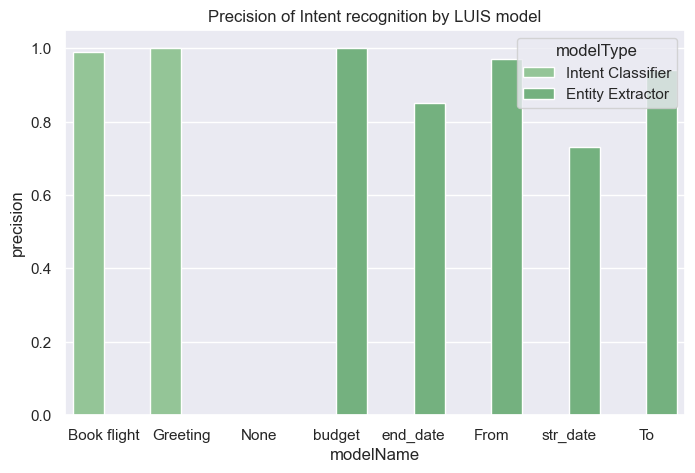

In [95]:
#Définir la taille du graphique
fig, ax = plt.subplots(figsize=(8,5))
#Définir lae type du graphique, ici BARPLOT avec en Labels l'index du nom des libelle
ax = sns.barplot(data=performance_luis_model, x="modelName", y="precision", hue="modelType")
plt.title(f"Precision of Intent recognition by LUIS model")
#Afficher le graphique
plt.show()

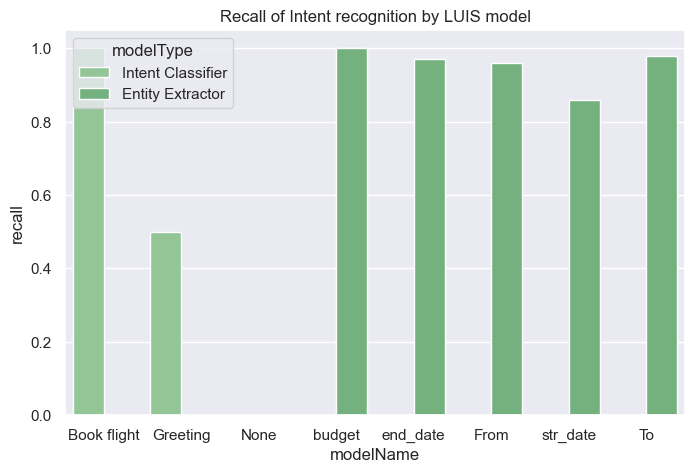

In [97]:
#Définir la taille du graphique
fig, ax = plt.subplots(figsize=(8,5))
#Définir lae type du graphique, ici BARPLOT avec en Labels l'index du nom des libelle
ax = sns.barplot(data=performance_luis_model, x="modelName", y="recall", hue="modelType")
plt.title(f"Recall of Intent recognition by LUIS model")
#Afficher le graphique
plt.show()

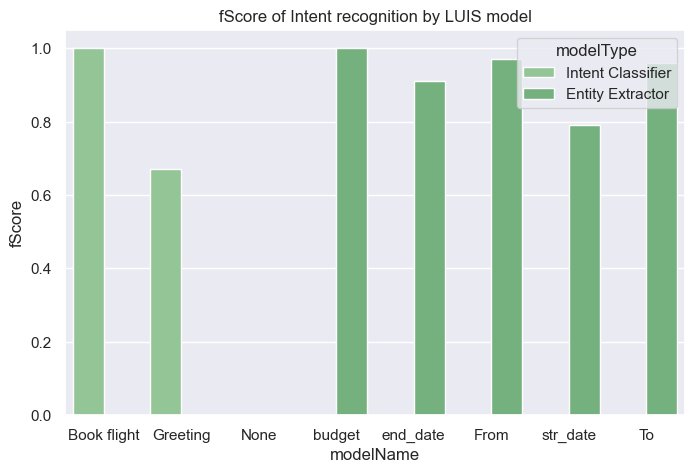

In [96]:
#Définir la taille du graphique
fig, ax = plt.subplots(figsize=(8,5))
#Définir lae type du graphique, ici BARPLOT avec en Labels l'index du nom des libelle
ax = sns.barplot(data=performance_luis_model, x="modelName", y="fScore", hue="modelType")
plt.title(f"fScore of Intent recognition by LUIS model")
#Afficher le graphique
plt.show()

In [13]:
for i in range(len(luis_batch_testing_results["intentModelsStats"])):
    print(luis_batch_testing_results["intentModelsStats"][i])

{'modelName': 'Book flight', 'modelType': 'Intent Classifier', 'precision': 0.99, 'recall': 1.0, 'fScore': 1.0}
{'modelName': 'Greeting', 'modelType': 'Intent Classifier', 'precision': 1.0, 'recall': 0.5, 'fScore': 0.67}
{'modelName': 'None', 'modelType': 'Intent Classifier', 'precision': 'NaN', 'recall': 'NaN', 'fScore': 'NaN'}


In [21]:
for i in range(len(luis_batch_testing_results["entityModelsStats"])):
    print(luis_batch_testing_results["entityModelsStats"][i])

{'modelName': 'budget', 'modelType': 'Entity Extractor', 'precision': 1.0, 'recall': 1.0, 'fScore': 1.0}
{'modelName': 'end_date', 'modelType': 'Entity Extractor', 'precision': 0.79, 'recall': 0.96, 'fScore': 0.87}
{'modelName': 'From', 'modelType': 'Entity Extractor', 'precision': 0.97, 'recall': 0.96, 'fScore': 0.97}
{'modelName': 'str_date', 'modelType': 'Entity Extractor', 'precision': 0.73, 'recall': 0.86, 'fScore': 0.79}
{'modelName': 'To', 'modelType': 'Entity Extractor', 'precision': 0.94, 'recall': 0.98, 'fScore': 0.96}


In [135]:
performance_luis_model_utterances = pd.json_normalize(luis_batch_testing_results["utterancesStats"])
# Applying the intent check condition
performance_luis_model_utterances["intent_check"] = np.where(performance_luis_model_utterances['predictedIntentName'] == performance_luis_model_utterances['labeledIntentName'], 1, np.nan)
performance_luis_model_utterances.insert(loc=6, column="falsePositive_check", value=np.nan)
performance_luis_model_utterances.insert(loc=7, column="falseNegative_check", value=np.nan)

for i in range(len(performance_luis_model_utterances)): #range(len(performance_luis_model_utterances)
    if len(performance_luis_model_utterances['falsePositiveEntities'][i]) != 1:
        performance_luis_model_utterances["falsePositive_check"][i] = 1
    if len(performance_luis_model_utterances['falseNegativeEntities'][i]) != 1:
        performance_luis_model_utterances["falseNegative_check"][i] = 1
performance_luis_model_utterances
performance_luis_model_utterances

C:\Users\blanc\AppData\Local\Temp\ipykernel_7124\2020520497.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_luis_model_utterances["falsePositive_check"][i] = 1
C:\Users\blanc\AppData\Local\Temp\ipykernel_7124\2020520497.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_luis_model_utterances["falseNegative_check"][i] = 1


,text,predictedIntentName,labeledIntentName,falsePositiveEntities,falseNegativeEntities,intent_check,falsePositive_check,falseNegative_check
0,"Hi there, I really want to go to Osaka but don...",Book flight,Book flight,"[{'entityName': 'To', 'startCharIndex': 205, '...","[{'entityName': 'To', 'startCharIndex': 33, 'e...",1.0,NaN,NaN
1,I want to go somewhere from toronto. ideally b...,Book flight,Book flight,[],"[{'entityName': 'str_date', 'startCharIndex': ...",1.0,1.0,NaN
2,I want to go to queenstown for 6 days,Book flight,Book flight,[],[],1.0,1.0,1.0
3,I would like to go to Ulsan from San Juan with...,Book flight,Book flight,[],[],1.0,1.0,1.0
4,Seattle it is!!,Book flight,Book flight,[],[],1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
131,Hi I've got 9 days free and I'm looking for a ...,Book flight,Book flight,[],[],1.0,1.0,1.0
132,I need to get to Fortaleza on September 8th or...,Book flight,Book flight,[],[],1.0,1.0,1.0
133,We're finally going on vacation isn't that ama...,Book flight,Book flight,[],[],1.0,1.0,1.0
134,"Hi there, I'm looking for a place to get away ...",Book flight,Book flight,[],[],1.0,1.0,1.0


In [126]:
#Exemple of wring intent detection by LUIS
performance_luis_model_utterances.loc[performance_luis_model_utterances["intent_check"].isna(), :]

,text,predictedIntentName,labeledIntentName,falsePositiveEntities,falseNegativeEntities,intent_check,falsePositive_check,falseNegative_check
115,Hi! I am very excited!!!!,Book flight,Greeting,[],[],NaN,1.0,1.0


In [165]:
intent_detection_efficiency = 100 - performance_luis_model_utterances["intent_check"].isna().mean() * 100
print(f"Le taux d'intention correctement detectée par le modèle LUIS est de = {round(intent_detection_efficiency, 2)} %")

Le taux d'intention correctement detectée est de = 99.26 %


In [167]:
entity_detection_efficiency = performance_luis_model_utterances["falsePositive_check"].isna().mean() * 100
print(f"Le taux d'entités detectées par le modèle LUIS alors qu'elles n'auraient pas dû est de  = {round(entity_detection_efficiency, 2)} %")

Le taux d'entités detectées alors qu'elles n'auraient pas dû est de  = 8.82 %


In [169]:
entity_detection_efficiency = performance_luis_model_utterances["falseNegative_check"].isna().mean() * 100
print(f"Le taux d'entités non detectées par le modèle LUIS comme nous aurions pu l'éspérer = {round(entity_detection_efficiency, 2)} %")

Le taux d'entités non detectées par le modèle LUIS comme nous aurions pu l'éspérer = 13.97 %
